# Important Note:

Originally, I tried to create clusters off of 100 survey questions and the result was one big cluster. I used the covariance matrix of the eigenvalues of all 100-ish questions to see which questions had the most variation. I then shortened the list of questions to the ones you see below to create the clusters, because these questions explain more of the variation between respondents than the others did.


In [3]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [4]:
df = pd.read_csv("Mapped Responses to Model Fewer Questions 3.csv")

df.columns = [
"Q2",
"Q34_1",
"Q34_2",
"Q34_3",
"Q34_4",
"Q38_4",
"Q39_5",
"Q55",
"Observation"]

In [5]:
df.head()

,Q2,Q34_1,Q34_2,Q34_3,Q34_4,Q38_4,Q39_5,Q55,Observation
0,7,2,1,4,3,3,3,0,1
1,7,2,1,3,4,4,2,0,2
2,4,2,1,4,3,1,5,2,3
3,7,1,2,4,3,2,3,0,4
4,5,1,3,4,2,1,1,2,5


In [6]:
df=df.astype(float)

In [7]:
#Standardization

#This code fills in NA values to 0 - which means everypoint can be standardized
df = df.fillna(value=0, axis = 1)


#x is an object with the values of the data frame - think of it as an object with a vector of values of 
#the cells in the dataframe
X = df.values

from sklearn.preprocessing import StandardScaler


#This code standardizes the values of of the data frame
X_std = StandardScaler().fit_transform(X)

In [8]:
#Notes on PCA

#PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition 
#of a data matrix, usually after mean centering (and normalizing or using Z-scores) the data matrix for each attribute. 
#The results of a PCA are usually discussed in terms of component scores, sometimes called factor scores 
#(the transformed variable values corresponding to a particular data point), and loadings 
#(the weight by which each standardized original variable should be multiplied to get the component score).

#The eigenvalues reflect the portion of variance explained by the corresponding component
#Example: we have 4 features with eigenvalues: 1,4,1,2. These are the variances explained by the corresponding vectors.
#The second value belongs to the first principle component as it explains 50% fo the overall variance and the last
#value belogns to the second principle component explaining 25% of the overall variance.

#The eigenvectors are the component's linear combinations
#They give the weights for the features so that you know which feature is weighted heavly and therefore has a high impact
#and visa versa

#Use the PCA based on correlation matrix instead of empiric covariance matrix IF the eigenvalues strongly differ 
#(in other words, if the magnitudes are drastically different)


In [9]:
#Once the data has been standardized, the next step is to reduce the dimensionality of the data set

#The actual clustering of KMeans clustering takes place in a 2-dimensional space. However, most datasets that we work with are not
# two-dimensional. This begs the question: how to we use Kmeans clustering on data with more than two dimensions?
# The answer is to use dimensionality reduction techniques to reduce the dimensionality of the data into a single feature or
# set of features that retain the important latent aspects of the original features. By "important" I mean features that
# explain the variance in the answers to the questions - so the value of the data is retained.

# This can be done through several dimensionality reduction techniques like Principal Component Analysis (PCA) or Singular 
# Value Decomposition (SVD). These techniques utilize some pretty cool linear algebra and matrix math to do this in a sound
# way.

#As it stands, the dimensionality of the dataset is around 8 - there are 8 features in the data.
#In order to truly cluster the data, the features need to be boiled down to 2, so that they can be plotted on an x-y axis
#Principal Component Analysis does this - it uses complex matrix math to basically take all of the data and condense it down
#into features that retain the measures in variation of the dataset with more features.

#That's why it is important later to join the dataset with the observations - that way you can unpack what makes the clusters
#different

#the code below does the Principle Component Analysis

#pca is an object with the number of principle components 
pca = PCA(n_components=2)

#this code basically applies the transformation (dimensionality reduction) specified in the previous line of code to the
#standardized values of the df
x_3d = pca.fit_transform(X_std)

#once we have achieved this reduction we can now plot the data in a 2d space and apply the KMeans clustering algorithm



In [10]:
#Covariance matrix to see which features are most important

#Basically the covariance matrix is the decomposition of the eigenvalues for each feature
#In other words the output below shows the impact of feature on the on the x-y principle components - the larger the impact
#the more important the feature. So by measuring the absolute value of the principle components we can guage a measure of how
#the feature effects the plot of the new model.

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
#print pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])

decomp = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])

print(decomp)

#decomp.to_csv("pca_decomposition.csv")


            Q2     Q34_1     Q34_2     Q34_3     Q34_4     Q38_4     Q39_5  \
PC-1 -0.258638  0.490672  0.454894 -0.505911 -0.423347 -0.050486 -0.079142   
PC-2 -0.613749 -0.143531 -0.190105  0.136640  0.203358 -0.341797 -0.195694   

           Q55  Observation  
PC-1  0.203412     0.007862  
PC-2  0.592745     0.008804  


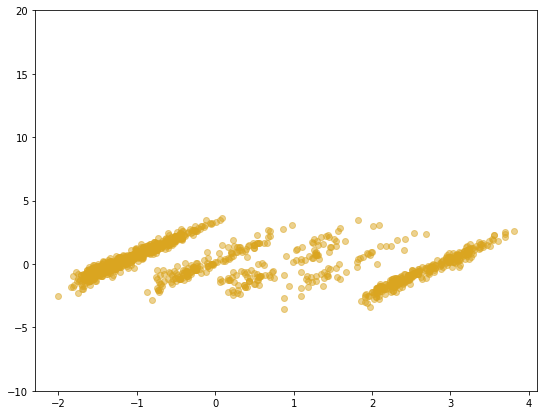

In [11]:
#The code below plots the dimensionally reduced data

plt.figure(figsize = (9,7))
plt.scatter(x_3d[:,0],x_3d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,20)
plt.show()

The above clusters do not lend themselves well to Kmeans clustering since they are not spherical in nature. Below is an exercise of how I would employ kmeans if it was the right model to use.

In [20]:
#Kmeans Clustering

#This code applies the clustering algorithm to the standardized, dimensionally reduced data.

kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_3d)
k=3
y_kmeans = kmeans.predict(x_3d)

In [21]:
#Applying the labels attribute of KMeans to get an array of the cluster assignment for each training vector

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

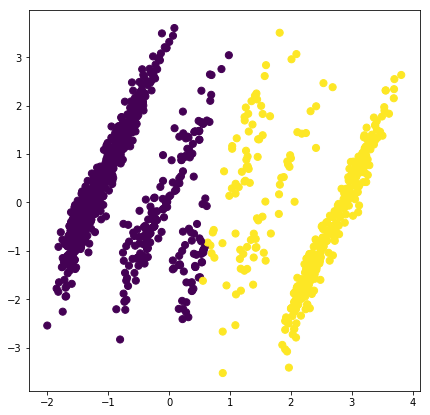

In [22]:
#plot of the clusters
plt.figure(figsize = (7,7))
plt.scatter(x_3d[:, 0], x_3d[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [15]:
#Finding the ideal value of K

#This code will create a for loop that loops throught the values of K (i through 40)
#The ideal value of K is one where the mean Error Rate of K is minimized

#One thing to note, the set seed isn't set so the ideal value of K will change. However, after running it many times,
#the mean error is usually minimized between k = 11 and k = 20. For the sake of practicality, I went with k=11

error = []

#Calculating error for K values between 1 and 40
for i in range(1,40):
    km = KMeans(n_clusters = i)
    kmeans.fit(x_3d)
    pred_i = kmeans.predict(x_3d)
    error.append(np.mean(pred_i != y_kmeans))

Text(0, 0.5, 'Mean Error')

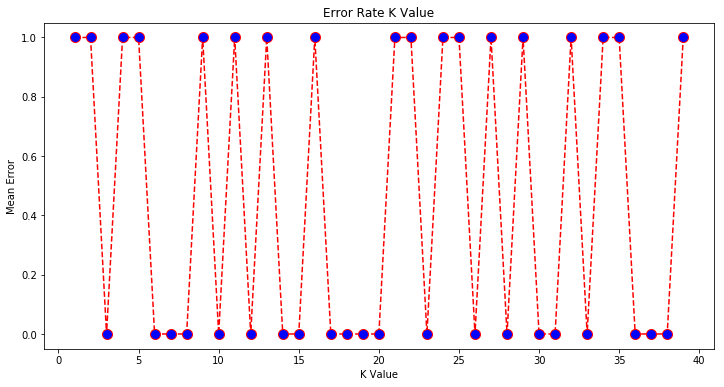

In [16]:
#Plotting the error values against the K values

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed', marker='o',markerfacecolor='blue',
        markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Obviouly, Kmeans is not the correct technique to use with this data since it is really only good at idenifying clusters that are circular. I will experiement with another technique below.

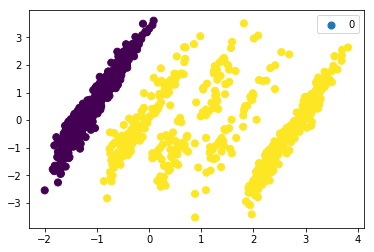

In [31]:
#testing nonlinear boundaries between clusters. The Spectral Clustering method is better at finding nonlinear boundaries.
#The results still aren't fitting the data perfectly.
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(x_3d)
plt.scatter(x_3d[:, 0], x_3d[:, 1], c=labels,
            s=50, cmap='viridis');
plt.legend(labels)

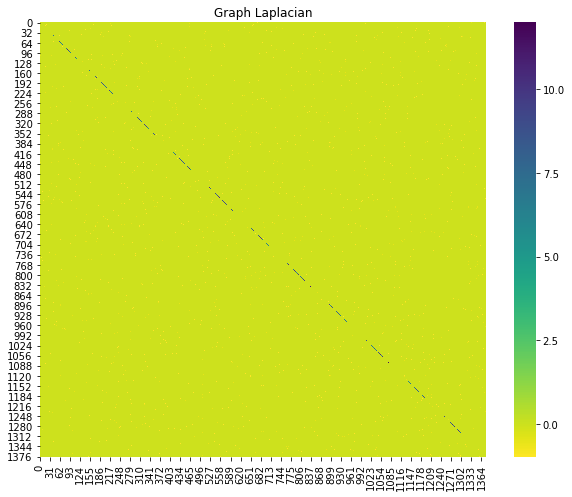

In [24]:
#In order to optimize the number of clusters we need to sort the eigenvalues from least to greatest

from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=x_3d, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=x_3d, nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

In [25]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)

In [26]:
#Since the graph Laplacian is a symmetric matrix, we know by the spectral theorem that all the eigenvalues must be real. 
#Let us verify this
np.unique(np.imag(eigenvals))

array([0.])

In [27]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [28]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.9999999999999998
Max Norm: 1.0000000000000002


[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

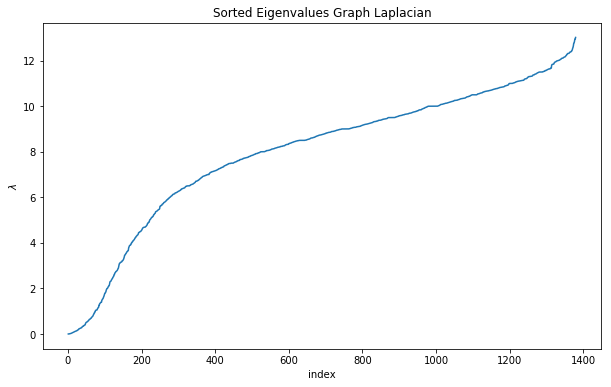

In [29]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

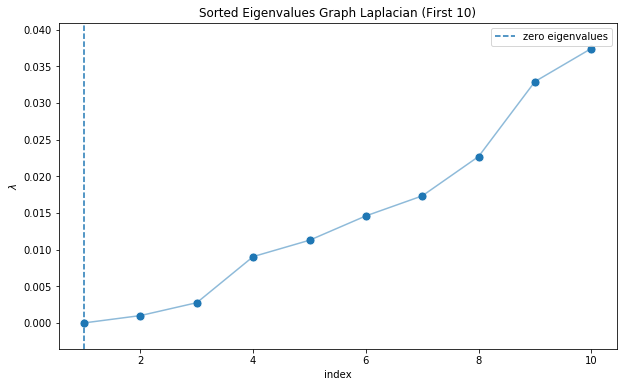

In [30]:
#zooming in. Clusters are optimized at 1. great
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=1, label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

Spectoral clustering was not a good option either as the optimal number of clusters to use to reduce errors was 1. I'll move on to a different method below.

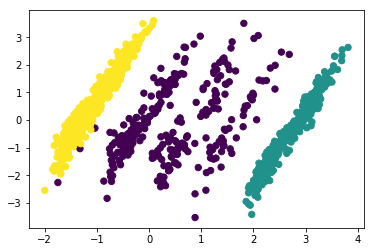

In [34]:
#Gaussian Mixture Model can be used to find clusters like kmeans, but it is a probabilistic model.
# We can predict the probability that each data point belongs to a certain cluster

#the results still are not recognizing that the clusters are ellipses when n=3, BUT if I up the number of clusters
#the fit of each cluster becomes closer and closer. We can ignore the cluster labels and combine them. 
#ex. the top cluster is broken into two, but we will combine them in

from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(x_3d)
labels = gmm.predict(x_3d)
plt.scatter(x_3d[:, 0], x_3d[:, 1], c=labels, s=40, cmap='viridis');

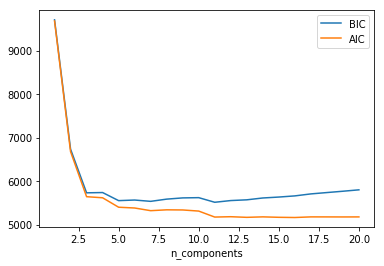

In [33]:
#The optimal number of clusters is the value that minimizes AIC or BIC. This is meant to measure how well it will work as 
# a density estimator
#elbow starts at 3
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(x_3d)
          for n in n_components]

plt.plot(n_components, [m.bic(x_3d) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x_3d) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [35]:
#This code basically pulls out the labels (or cluster) that each standaridized, dimensionally reduced data and consolidates them.

result = zip(x_3d[:, 0], x_3d[:, 1], gmm.predict(x_3d), df.Observation)

In [36]:
#This data pulls the labled data and adds in a column for the cluster each observation belongsto and a column for the x-y
#oordinates of each point

sortedR = sorted(result, key=lambda x: x[1])


[(0.8818435765881448, -3.527835569198333, 0, 51.0),
 (1.9673919285196098, -3.4153470369456636, 1, 739.0),
 (1.9374815481505134, -3.0821853466448914, 1, 233.0),
 (1.9058330416483023, -3.0366456868175895, 1, 135.0),
 (1.8591094538439903, -2.9459367026749135, 1, 577.0),
 (-0.8030459071375979, -2.834050176271004, 0, 870.0),
 (2.0842469212832206, -2.7938411713220304, 1, 193.0),
 (2.030132514242797, -2.729475081349784, 1, 1266.0),
 (0.8811515295330961, -2.6709185872357986, 0, 674.0),
 (1.9063665190076502, -2.6342419364788667, 1, 651.0),
 (2.053967361236833, -2.6175191089892276, 1, 990.0),
 (2.0554061363995717, -2.6159078697189506, 1, 1063.0),
 (-1.9983811509086917, -2.5460110501571602, 2, 423.0),
 (1.0891944447152397, -2.538950067298158, 0, 912.0),
 (1.9528113753121483, -2.506785432093776, 1, 178.0),
 (2.0908926503686907, -2.500723269912958, 1, 34.0),
 (1.966154536752888, -2.4918428432447675, 1, 855.0),
 (1.90568082495766, -2.4516811292506624, 1, 1122.0),
 (0.22178300761157976, -2.4130823424

In [37]:
#Exporting the labeled dataset as a csv


df_1 = pd.DataFrame(sortedR)
df_1.columns = [
    "x Coordinates",
    "Y Coordinates",
    "Cluster",
    "Observation"]
    

df_1.head()


,x Coordinates,Y Coordinates,Cluster,Observation
0,0.881844,-3.527836,0,51.0
1,1.967392,-3.415347,1,739.0
2,1.937482,-3.082185,1,233.0
3,1.905833,-3.036646,1,135.0
4,1.859109,-2.945937,1,577.0


In [38]:
df_1.to_csv("Clusters.csv")

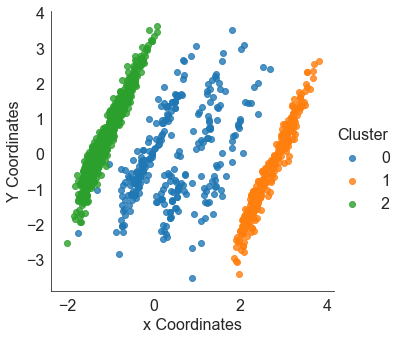

In [39]:
#Plot the data with the clusters labeled

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')


df_plot = zip(x_3d[:, 0], x_3d[:, 1], gmm.predict(x_3d))
df_plot2 = pd.DataFrame(df_plot)

df_plot2.columns = [
    "x",
    "y",
    "label"]
    

facet = sns.lmplot(data=df_1, x='x Coordinates', y='Y Coordinates', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)